
-----
#### MS: Unique patterns of mutations in childhood cancer highlight chemotherapy’s disease-defining role at relapse
### Extended Data Figure 6
-----

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

import os

set2_cols = sns.color_palette("Set2")

-----
##### Set up input / output directories

In [2]:
## Provide an output directory for figures or use 'installation_folder/figures' directory
root_dir = os.path.dirname(os.getcwd())
fig_out = os.path.join(root_dir, 'figures')
## Or provide a results path
#fig_out = '/Users/dir1/dir2/Figures'

-----
##### Load & prepare data 

In [ ]:
## Load patients metadata
kzm611_md = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_md.txt'), sep='\t', index_col=0)

low_samples = kzm611_md[kzm611_md.Burden=='low'].index.tolist()

naive_samples = kzm611_md[kzm611_md.Therapy=='Pre-Therapy'].index.tolist()
treated_samples = kzm611_md[kzm611_md.Therapy=='Post-Therapy'].index.tolist()

naive_low_samples = [x for x in naive_samples if x in low_samples]
treated_low_samples = [x for x in treated_samples if x in low_samples]

In [4]:
pog_drugs = pd.read_csv(os.path.join(root_dir, 'source_data/POG_data/POG570_all_drugs_YN.tsv'), sep='\t', index_col=0)
pog_drugs = pog_drugs[['CISPLATIN', 'CARBOPLATIN', 'OXALIPLATIN']]
pog_plat_samples = pog_drugs[(pog_drugs.CISPLATIN=='Y') | (pog_drugs.CARBOPLATIN=='Y') | (pog_drugs.OXALIPLATIN=='Y')].index.tolist()
print(f"Platinum treated samples: {len(pog_plat_samples)}")
pog_drugs['Platinums'] = ['Y' if 'Y' in pog_drugs.loc[x].sum() else 'N' for x in pog_drugs.index]

pog_drugs.head(2)

Platinum treated samples: 222


,CISPLATIN,CARBOPLATIN,OXALIPLATIN,Platinums
POG_37862,N,N,N,N
POG_28132,Y,N,N,Y


In [ ]:
pog_novelSBS = pd.read_csv(os.path.join(root_dir, 'source_data/POG_data/POG_novelSBS_exposure.tsv'), sep='\t', index_col=0)
pog_novelDBS = pd.read_csv(os.path.join(root_dir, 'source_data/POG_data/POG_novelDBS_exposure.tsv'), sep='\t', index_col=0)

pog_novelSBS_samples = pog_drugs.loc[pog_novelSBS[pog_novelSBS.SBS288L5>99].index.tolist()].index.tolist()
pog_novelDBS_samples = pog_drugs.loc[pog_novelDBS[pog_novelDBS.DBS78H2>24].index.tolist()].index.tolist()
pog_novelSBS.head(2)

,SBS1,SBS2,SBS3,SBS4,SBS5,SBS6,SBS7a,SBS7b,SBS7c,SBS7d,...,SBS288L1,SBS288L2,SBS288L3,SBS288L4,SBS288L5,SBS288H1,SBS288H2,SBS288H3,SBS288H4,SBS288H5
Samples,,,,,,,,,,,,,,,,,,,,,
POG_11004,2139,0,0,0,1305,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
POG_11307,423,0,0,0,1706,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
pog_sbs = pd.read_csv(os.path.join(root_dir, 'source_data/POG_data/POG_SBS288_exposure.tsv'), sep='\t', index_col=0)
pog_dbs = pd.read_csv(os.path.join(root_dir, 'source_data/POG_data/POG_DBS78_exposure.tsv'), sep='\t', index_col=0)

pog_dbs['Total_dbs'] = pog_dbs.sum(axis=1)
pog_sbs['Total'] = pog_sbs.sum(axis=1)
pog_sigs = pd.concat([pog_sbs, pog_dbs], axis=1)
pog_sigs = pog_sigs.fillna(0)
pog_sigs = pog_sigs[['SBS31', 'SBS35', 'DBS5', 'Total', 'Total_dbs']]
pog_plat_sigs = pog_sigs[(pog_sigs.SBS31>99) | (pog_sigs.SBS35>99) | (pog_sigs.DBS5>24)].index.tolist()
pog_sigs.head(3)

,SBS31,SBS35,DBS5,Total,Total_dbs
Samples,,,,,
POG_11004,0,0,0.0,12578,0.0
POG_11307,0,0,0.0,4148,0.0
POG_11698,0,0,0.0,414062,0.0


In [8]:
len(pog_sigs[(pog_sigs.SBS31>99) | (pog_sigs.SBS35>99) | (pog_sigs.DBS5>24)].index.tolist())

63

In [34]:
pog_thr = pd.read_csv(os.path.join(root_dir, 'source_data/POG_data/POG_therapy.tsv'), sep='\t')
pog_pats = pd.read_csv(os.path.join(root_dir, 'source_data/POG_data/POG_patients.tsv'), sep='\t')
pog_pats.head(2)

,PATIENT_ID,SAMPLE_ID_DNA,SAMPLE_ID_RNA,AGE,GENDER,TUMOUR_TYPE,HISTOLOGICAL_TYPE,BIOPSY_SITE,BIOPSY_COHORT,ANALYSIS_COHORT,PRIMARY_SITE,METASTATIC_OR_RECURRENCE,TUMOUR_CONTENT,EGAD_ID
0,11004,A10504,A10506,30,F,Colorectal Adenocarcinoma,COAD,Liver,Liver,COLO,Colon,Metastatic,73,EGAD00001001307
1,11307,A10512,A10513,48,F,Breast Invasive Ductal Carcinoma,IDC,Liver,Liver,BRCA,Breast,Metastatic,59,EGAD00001002017


In [10]:
pog_treats = pd.read_csv(os.path.join(root_dir, 'source_data/POG_data/POG_treatments.tsv'), sep='\t')
#pog_treats = pog_treats[pog_treats.Drug_name.isin(['CISPLATIN', 'CARBOPLATIN'])].reset_index(drop=True)
pog_treats = pog_treats[pog_treats.Drug_name.isin(['CISPLATIN', 'CARBOPLATIN', 'OXALIPLATIN'])].reset_index(drop=True)

pog_treats['Biopsy_date'] = [pog_thr[pog_thr.Patient_ID==x]['Biopsy_date'].values[0] for x in pog_treats.Patient_ID]
pog_treats = pog_treats.sort_values(['Patient_ID', 'Therapy_start_date']).reset_index(drop=True)
pog_treats = pog_treats.drop_duplicates(subset=['Patient_ID'], keep='first')
pog_treats['Days_from'] = pog_treats.Biopsy_date - pog_treats.Therapy_start_date
pog_treats['Platin_sig'] = ['Y' if f'POG_{x}' in pog_plat_sigs else 'N' for x in pog_treats.Patient_ID]
pog_treats['Type'] = [pog_pats[pog_pats.PATIENT_ID==x]['HISTOLOGICAL_TYPE'].values[0] for x in pog_treats.Patient_ID]
pog_treats = pog_treats[~(pog_treats.Patient_ID.isin([25976]))]
pog_treats['SBS'] = [pog_sigs.loc[f'POG_{x}', 'Total'] for x in pog_treats.Patient_ID]
pog_treats['Days_log'] = np.log10(pog_treats.Days_from+0.00000000001)
pog_treats['SBS_log'] = np.log10(pog_treats.SBS+0.00000000001)

size_col = []
for r in range(pog_treats.shape[0]):
    if pog_treats.Platin_sig.iloc[r] == 'Y':
        size_col.append(100)
    else:
        size_col.append(50)

pog_treats['Size'] = size_col
pog_treats['Patient_ID'] = ['POG_'+str(x) for x in pog_treats.Patient_ID]

pog_treats.head(2)

,Patient_ID,Drug_name,Treatment_course_number,Class_1,Class_2,Pathway,Therapy_start_date,Therapy_end_or_biopsy_date,On_treatment_at_biopsy,Biopsy_date,Days_from,Platin_sig,Type,SBS,Days_log,SBS_log,Size
0,POG_11698,CISPLATIN,1,DNA alkylating,DNA damage inducer,DNA damage,0,230,0,1803,1803,N,BCC,414062,3.255996,5.617065,50
3,POG_12255,CISPLATIN,1,DNA alkylating,DNA damage inducer,DNA damage,0,21,0,726,726,Y,ATRT,3218,2.860937,3.507586,100


In [11]:
pog_treats.shape, pog_treats.Drug_name.value_counts()

((221, 17),
 Drug_name
 CISPLATIN      103
 CARBOPLATIN     60
 OXALIPLATIN     58
 Name: count, dtype: int64)

In [12]:
novel_treats = pog_treats[pog_treats.Patient_ID.isin(pog_novelSBS_samples+pog_novelDBS_samples)].copy()

In [13]:
pog_treats.shape, pog_treats[(pog_treats.Days_from>90) & (pog_treats.SBS>1453)].shape

((221, 17), (171, 17))

In [14]:
pog_treats[(pog_treats.Days_from>90) & (pog_treats.SBS>1453)].Platin_sig.value_counts()

Platin_sig
N    111
Y     60
Name: count, dtype: int64

In [15]:
60/171, 41/122

(0.3508771929824561, 0.3360655737704918)

In [16]:
pog_treats[(pog_treats.Days_from>90) & (pog_treats.SBS>1453)].Platin_sig.value_counts()

Platin_sig
N    111
Y     60
Name: count, dtype: int64

-----
## Panel

0


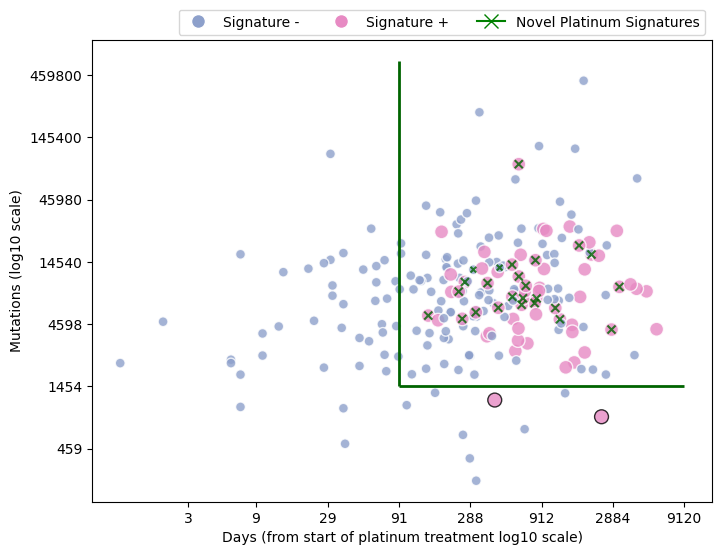

In [ ]:
pog_treats['color'] = [set2_cols[2] if x=='N' else set2_cols[3] for x in pog_treats.Platin_sig]

pcols = []

novel_counter = 0
for r in range(pog_treats.shape[0]):
    if pog_treats.Platin_sig.iloc[r] == 'Y':
        if pog_treats.SBS.iloc[r] < 1453:
            pcols.append('black')
        else:
            pcols.append('white')
    else:
         pcols.append('white')


f, ax = plt.subplots(figsize=(8,6))

ax.scatter(x=pog_treats.Days_log, y=pog_treats.SBS_log,
                     c=pog_treats.color,
                     linewidth=1,
                     s=pog_treats.Size,
                     edgecolor=pcols,
                     alpha=0.8
                     )
ax.scatter(x=novel_treats.Days_log, y=novel_treats.SBS_log,
                     c='darkgreen',
                     s=novel_treats.Size/3,
                     marker='x',
                     alpha=0.8
                     )

custom_lines = [Line2D([0], [0], color='white', marker='o', mfc=set2_cols[2], ms=10),
                Line2D([0], [0], color='white', marker='o', mfc=set2_cols[3], ms=10),
                Line2D([0], [0], color='green', marker='x', mfc='white', ms=10)]
leg_labels = ['Signature -', 'Signature +', 'Novel Platinum Signatures']
ax.legend(custom_lines, leg_labels, loc='upper right',
          bbox_to_anchor=(1,1.08), ncol = 8, fontsize=10)

ax.set_xticks([0.477, 0.9542, 1.46, 1.96, 2.46, 2.96, 3.46, 3.96])
ax.set_xticklabels([3, 9, 29, 91, 288, 912, 2884, 9120])

ax.set_yticks([2.1625, 2.6625, 3.1625, 3.6625, 4.1625, 4.6625, 5.1625, 5.6625])
ax.set_yticklabels([145, 459, 1454, 4598, 14540, 45980, 145400, 459800])

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
min_day = pog_treats[pog_treats.Platin_sig=='Y'].Days_log.min()
min_sbs = pog_treats[pog_treats.Platin_sig=='Y'].SBS_log.min()

'''plt.axvline(min_day, color="gray", alpha=0.5)
plt.axhline(min_sbs, color="gray", alpha=0.5)'''


ax.vlines(x=1.96, ymin=3.1625, ymax=y_max, color="darkgreen", linewidth=2)
ax.hlines(y=3.1625, xmin=1.96, xmax=x_max, color="darkgreen", linewidth=2)

plt.ylabel('Mutations (log10 scale)', fontsize=10)
plt.xlabel('Days (from start of platinum treatment log10 scale)', fontsize=10)

print(novel_counter)

plt.savefig(os.path.join(fig_out, 'ExFig_6.pdf'), bbox_inches="tight")